## Aviation Safety Risk Analysis for Aircraft Procurement  
___
**Author**: Reeves Gonah  
**Date**:  
**Project**: Phase 1 End Project  
**Data Source**: [Aviation Safety Network (Scraped)](https://www.kaggle.com/datasets/anandkushawaha/aviation-crashed-flights-data)  
***

### <ins>Introduction.<ins>  
As the organization considers expanding into aerospace operations, a clear understanding of patterns in accident frequency and severity is critical for minimizing operational risk.This project analyzes historical aviation accident data from the National Transportation Safety Board (NTSB) to support data-driven aircraft procurement decisions.  
Through exploratory data analysis and visualization, this notebook identifies aircraft characteristics and operational factors associated with safer outcomes. The findings are used to develop practical recommendations to guide aircraft selection and risk management strategy.

The CRISP-DM method, a structured, six-phase framework, has been appropriately selected to guide data analysis being carried out as follows below for the entirety of the project, each phase numbered and highlighted as concisely as possible.

### 1. <ins>Business Understanding<ins>  
##### **Business Context**
The company is considering entry into the aviation market by purchasing and operating aircraft. To support procurement decisions, the aim is to analyze historical aviation accident data to identify aircraft that are associated with lower operational risk.

##### **Business Objective**
Identify aircraft that are associated with lower accident risk and severity, or good durability, in order to guide safer aircraft acquisition and operational planning.

##### **Key Business Questions**
The following are the key questions this analysis attempts to answer as they would directly inform procurement decisions:    

*   How has accident risk changed over time?  
*   Which aircraft or aircraft types are more prone to accidents?  
*   Which aircraft provide the most safety and are the most durable in accidents?  

##### **Success Criteria**
The aforementioned questions will be considered as well answered by three data-backed procurement recommendations with visual/graphical evidence as support.

### 2. <ins>Data Understanding<ins>  

##### **Data Source and Description.**
This dataset has been scrapped from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters. It has been downloaded from [this kaggle repository](https://www.kaggle.com/datasets/anandkushawaha/aviation-crashed-flights-data) as a csv file, published by Adity Kushawa 2025* and saved as 'flight.csv' in this project's directory.

**latest update by date of download*




##### **Initial Data Load**
Preliminary analysis on existing data to identify the form and metrics of our data is necessary

In [1]:
# import necessary libraries likely to be used

import pandas as pd     #for data structures
import numpy as np      #for numerical operations
import seaborn as sns   #for visualization
import matplotlib.pyplot as plt     #for visualization
#%matplotlib.inline

In [2]:
#load the dataset as a pandas dataframe, df, and display the first few rows, as well as the shape

df = pd.read_csv('flight.csv')

#get the total number of rows and columns
print("no. of rows,no. of columns:", df.shape)

#identify the columns that exist in our dataset
print("column names:",df.columns)

#preview the loaded dataset in a dataframe
df

no. of rows,no. of columns: (2500, 8)
column names: Index(['Unnamed: 0', 'acc.date', 'type', 'reg', 'operator', 'fat', 'location',
       'dmg'],
      dtype='object')


,Unnamed: 0,acc.date,type,reg,operator,fat,location,dmg
0,0,3 Jan 2022,British Aerospace 4121 Jetstream 41,ZS-NRJ,SA Airlink,0,near Venetia Mine Airport,sub
1,1,4 Jan 2022,British Aerospace 3101 Jetstream 31,HR-AYY,LANHSA - Línea Aérea Nacional de Honduras S.A,0,Roatán-Juan Manuel Gálvez International Airpor...,sub
2,2,5 Jan 2022,Boeing 737-4H6,EP-CAP,Caspian Airlines,0,Isfahan-Shahid Beheshti Airport (IFN),sub
3,3,8 Jan 2022,Tupolev Tu-204-100C,RA-64032,"Cainiao, opb Aviastar-TU",0,Hangzhou Xiaoshan International Airport (HGH),w/o
4,4,12 Jan 2022,Beechcraft 200 Super King Air,NaN,private,0,"Machakilha, Toledo District, Grahem Creek area",w/o
...,...,...,...,...,...,...,...,...
2495,1245,20 Dec 2018,Cessna 560 Citation V,N188CW,Chen Aircrafts LLC,4,"2 km NE of Atlanta-Fulton County Airport, GA (...",w/o
2496,1246,22 Dec 2018,PZL-Mielec M28 Skytruck,GNB-96107,Guardia Nacional Bolivariana de Venezuela - GNBV,0,Kamarata Airport (KTV),sub
2497,1247,24 Dec 2018,Antonov An-26B,9T-TAB,Air Force of the Democratic Republic of the Congo,0,Beni Airport (BNC),w/o
2498,1248,31 Dec 2018,Boeing 757-2B7 (WL),N938UW,American Airlines,0,"Charlotte-Douglas International Airport, NC (C...",sub


The author of the kaggle dataset provides additional context by providing a preview of key fields as follows:
* **Date**: The date of the crash
* **Type**: Aircraft model/type
* **Registration**: Aircraft registration code
* **Operator**: Airline or organization operating the aircraft
* **fat**: Number of fatalities reported in the crash (passengers + crew)
* **Location**: Where the crash occurred
* **dmg**: Damage severity (encoded)

Similarly, the damage severity can be observed to have categorical values like sub and w/o. These are decoded as follows, representing an assesment of aircraft damage:
* **sub** → Substantial Damage
* **w/o** → Write-Off (Total Loss)
* **non** → No Damage / Minor

Further assesing our data for summary statistics can be done for full data understanding.

In [3]:
#Statistics for all columns
df.info() # to get each columns data type and non null values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2500 non-null   int64 
 1   acc.date    2500 non-null   object
 2   type        2500 non-null   object
 3   reg         2408 non-null   object
 4   operator    2486 non-null   object
 5   fat         2488 non-null   object
 6   location    2500 non-null   object
 7   dmg         2500 non-null   object
dtypes: int64(1), object(7)
memory usage: 156.4+ KB


In [4]:
#Check for total duplicate values (true =1, False =0)
df.duplicated().sum()


1250

##### **Data Quality Assesment**
In totality, the following preliminary observations on the provided data can be made:

In [5]:
"""
    1. The data contains 2500 data entry rows with 8 columns detailing the date,location, aircraft registration, type and damage
        as well as the operator, aircraft damage level and fatalities.
    2. Half the dataset is a duplicate of the original. 1250 duplicate values could indicate that the dataset is repeated 
        and further analysis is required.
    2. There are a few errors: wrong daata types for certain columns e.g date, missing values, prominently in the aircraft
        registration column as well as a few others.
    3. Column names are not easily deduced. fat,dmg and reg cannot be easily interpretted.
    4. Decoding of the damage column could make for easier interpretation.
"""

'\n    1. The data contains 2500 data entry rows with 8 columns detailing the date,location, aircraft registration, type and damage\n        as well as the operator, aircraft damage level and fatalities.\n    2. Half the dataset is a duplicate of the original. 1250 duplicate values could indicate that the dataset is repeated \n        and further analysis is required.\n    2. There are a few errors: wrong daata types for certain columns e.g date, missing values, prominently in the aircraft\n        registration column as well as a few others.\n    3. Column names are not easily deduced. fat,dmg and reg cannot be easily interpretted.\n    4. Decoding of the damage column could make for easier interpretation.\n'

Important information that could be beneficial to this project can also be noticed to be absent. This would include columns such as phase of flight *(takeoff, cruise or landing)*, passenger capacity, probable cause *(aircraft malfunction or human error)* , cost, e.t.c that could have allowed for a more thorough analysis onto best fits for the company.

### 3.<ins>Data Preparation<ins>
Inconsistencies noticed earlier need to be ammended.These are done stepwise as follows:

#### **3.1. Changing column titles**

In [6]:
#create a list containing the new values
new_titles = ['I.d','Date', 'Aircraft type', 'Registration','Operator','Fatalities','Location','Damage']

#assign the new values
df.columns = new_titles

#df.tail()

#### **3.2 Removing duplicates**

The I.d and the index are inconsistent, likely because each row was duplicated as preliminary results suggested.

In [7]:
#check the I.d column for value counts
df['I.d'].value_counts()

1249    2
838     2
824     2
826     2
828     2
       ..
417     2
419     2
421     2
423     2
0       2
Name: I.d, Length: 1250, dtype: int64

In [8]:
# Appears to be true. Load the middle of the table to check
df[1249: 1255]

,I.d,Date,Aircraft type,Registration,Operator,Fatalities,Location,Damage
1249,1249,unk. date 2018,Rockwell Sabreliner 80,N337KL,private,0,"Eugene Airport, OR (EUG)",sub
1250,0,3 Jan 2022,British Aerospace 4121 Jetstream 41,ZS-NRJ,SA Airlink,0,near Venetia Mine Airport,sub
1251,1,4 Jan 2022,British Aerospace 3101 Jetstream 31,HR-AYY,LANHSA - Línea Aérea Nacional de Honduras S.A,0,Roatán-Juan Manuel Gálvez International Airpor...,sub
1252,2,5 Jan 2022,Boeing 737-4H6,EP-CAP,Caspian Airlines,0,Isfahan-Shahid Beheshti Airport (IFN),sub
1253,3,8 Jan 2022,Tupolev Tu-204-100C,RA-64032,"Cainiao, opb Aviastar-TU",0,Hangzhou Xiaoshan International Airport (HGH),w/o
1254,4,12 Jan 2022,Beechcraft 200 Super King Air,NaN,private,0,"Machakilha, Toledo District, Grahem Creek area",w/o


In [9]:
# Conclusion: Table is repeated, hence duplicates
#remove duplicates and reassign the new unique values to the dataframe
df = df.drop_duplicates()

#check dataframe shape
df.shape
 
# ->duplicates dropped!

(1250, 8)

In [10]:
# Lastly assign I.d column to be the new index:
df.set_index('I.d', inplace=True)

#### **3.3. Column by Column Cleaning & Preperation**

Approach each column individually. Identify patterns to errors, rectify and deal with missing values on a row by row basis.

In [11]:
#Preview the dataframe as is
df

,Date,Aircraft type,Registration,Operator,Fatalities,Location,Damage
I.d,,,,,,,
0,3 Jan 2022,British Aerospace 4121 Jetstream 41,ZS-NRJ,SA Airlink,0,near Venetia Mine Airport,sub
1,4 Jan 2022,British Aerospace 3101 Jetstream 31,HR-AYY,LANHSA - Línea Aérea Nacional de Honduras S.A,0,Roatán-Juan Manuel Gálvez International Airpor...,sub
2,5 Jan 2022,Boeing 737-4H6,EP-CAP,Caspian Airlines,0,Isfahan-Shahid Beheshti Airport (IFN),sub
3,8 Jan 2022,Tupolev Tu-204-100C,RA-64032,"Cainiao, opb Aviastar-TU",0,Hangzhou Xiaoshan International Airport (HGH),w/o
4,12 Jan 2022,Beechcraft 200 Super King Air,NaN,private,0,"Machakilha, Toledo District, Grahem Creek area",w/o
...,...,...,...,...,...,...,...
1245,20 Dec 2018,Cessna 560 Citation V,N188CW,Chen Aircrafts LLC,4,"2 km NE of Atlanta-Fulton County Airport, GA (...",w/o
1246,22 Dec 2018,PZL-Mielec M28 Skytruck,GNB-96107,Guardia Nacional Bolivariana de Venezuela - GNBV,0,Kamarata Airport (KTV),sub
1247,24 Dec 2018,Antonov An-26B,9T-TAB,Air Force of the Democratic Republic of the Congo,0,Beni Airport (BNC),w/o


In [12]:
#Create a function that can remove whitespace and convert to lowercase that can be reused for multiple cols.
def strip_and_lower(column):
    column = column.str.lower()
    column = column.str.strip()
    return column

##### **a)Date Column**

In [13]:
#Research based standard practice to prevent subtle bugs, ensuring modification is done on df dataframe
df = df.copy()

#remove whitespace and lower
df['Date'] = strip_and_lower(df['Date'])

#get summative statistics
print(df['Date'].describe())

#get unique values
print(df['Date'].value_counts())

#Convert the data type to date
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

df = df.copy()

count           1250
unique           871
top       3 mar 2020
freq              12
Name: Date, dtype: object
3 mar 2020     12
24 feb 2022     6
15 apr 2018     6
10 mar 2019     5
11 sep 2019     5
               ..
22 sep 2021     1
20 jul 2019     1
27 aug 2018     1
5 aug 2022      1
30 sep 2020     1
Name: Date, Length: 871, dtype: int64


In [14]:
#Check for total missing values
df['Date'].isna().sum()

3

In [15]:
"""
Consider dropping these rows as this is an integral field, especially if other fields are missing
because only three rows lack dates.
"""
#Filter those rows to view those with missing dates
missing_dates = df['Date'].isna() #create a df with the missing dates bool
df.loc[missing_dates] #locate and print


,Date,Aircraft type,Registration,Operator,Fatalities,Location,Damage
I.d,,,,,,,
101,NaT,Antonov An-2R,RA-17951,Voskhod LLC,0,near Oymyakon Airfield,sub
233,NaT,Antonov An-2,NaN,Korean People's Army Air and Anti-Air Force (K...,5,near Taechon Air Base,w/o
1249,NaT,Rockwell Sabreliner 80,N337KL,private,0,"Eugene Airport, OR (EUG)",sub


In [16]:
""" All other columns are filled. These would also skew data slightly for the case of antonov aircraft as
    2 are present
"""

#Best option is to forward fill or backward fill
df['Date'].fillna(method='ffill',inplace=True)


##### **b) Aircraft Type Column**

In [17]:
#strip and lower
df['Aircraft type'] = strip_and_lower(df['Aircraft type'])

#Preview unique values
df['Aircraft type'].unique()


array(['british aerospace 4121 jetstream 41',
       'british aerospace 3101 jetstream 31', 'boeing 737-4h6',
       'tupolev tu-204-100c', 'beechcraft 200 super king air',
       'airbus a320-214 (wl)', 'cessna 208b grand caravan ex',
       'airbus a320-232', 'bombardier cl-600-2b16 challenger 604',
       'beechcraft b300 king air 350', 'hawker 1000',
       'cessna 208b grand caravan', 'embraer erj-190-100lr',
       'antonov an-26', 'cessna 501 citation i/sp', 'antonov an-2r',
       'let l-410uvp-e3', 'atr 42-500', 'britten-norman bn-2a-9 islander',
       'swearingen sa226-at merlin iv', 'embraer emb-500 phenom 100e',
       'de havilland canada dhc-3t texas turbine otter',
       'raytheon hawker 800xp', 'antonov an-2', 'antonov an-22a',
       'antonov an-26-100', 'antonov an-74t', 'cessna 208b supervan 900',
       'antonov an-124-100', 'antonov an-225',
       'embraer erj 170-200 lr (erj-175lr)', 'shaanxi y-8q',
       'embraer emb-500 phenom 100', 'boeing 737-8as (wl)',
  

In [18]:
# Observation: The data is highly granular.
# i.e each aircraft would be represented as its own type which wouldn't inform us of anything about manufacturers

""" Idea is to extract a make and model by splitting the 'aircraft type' into two new columns
    (maker and model) based on the first set of text/word that contains a number """

#create a function that could do this
def manufacturer_and_model(aircraft_type):
    
    #Assign null values for those with missing aircraft types
    if pd.isna(aircraft_type):
        return None,None
    
    #For non-null values, split text into individual words
    words = str(aircraft_type).split()

    #create a new variable to store the index position of the first digit
    digit_index = None

    #Loop through each word
    for i,word in enumerate(words):
        #and each character to find out if it is a number or not
        for character in word:
            if character.isdigit():
                digit_index = i
                break

        #stop the character iteration if a number is found
        if digit_index is not None:
            break

    #If no digit is found, return all the words as the manufacturer as long as the first word is not none
    if digit_index is None:
        make = words[0]
        model = " ".join(words [1:]) if len(words) > 1 else None
        return make, model
    
    #If a digit is found, all the words before the word with the digit are manufacturer, rest are model
    make = " ".join(words[:digit_index])
    model = " ".join(words[digit_index:])
    
    return make, model

In [19]:
# Now to use this function to clean the data into the two new columns:

# Create empty lists for the manufacturer and model
aircraft_manufacturer = []
aircraft_model =[]

#Loop through the data column, appending the manufacturer and model to the list
for aircraft in df['Aircraft type']:
    make, model= manufacturer_and_model(aircraft)

    #add to list
    aircraft_manufacturer.append(make)
    aircraft_model.append(model)

#Create new columns in the original dataframe for the manufacturer and aircraft model of each row
df['Manufacturer'] = aircraft_manufacturer
df['Model'] = aircraft_model

#Ensure changes are made into the database
df = df.copy()

# Show a few rows of the dataframe
df.head()

,Date,Aircraft type,Registration,Operator,Fatalities,Location,Damage,Manufacturer,Model
I.d,,,,,,,,,
0,2022-01-03,british aerospace 4121 jetstream 41,ZS-NRJ,SA Airlink,0,near Venetia Mine Airport,sub,british aerospace,4121 jetstream 41
1,2022-01-04,british aerospace 3101 jetstream 31,HR-AYY,LANHSA - Línea Aérea Nacional de Honduras S.A,0,Roatán-Juan Manuel Gálvez International Airpor...,sub,british aerospace,3101 jetstream 31
2,2022-01-05,boeing 737-4h6,EP-CAP,Caspian Airlines,0,Isfahan-Shahid Beheshti Airport (IFN),sub,boeing,737-4h6
3,2022-01-08,tupolev tu-204-100c,RA-64032,"Cainiao, opb Aviastar-TU",0,Hangzhou Xiaoshan International Airport (HGH),w/o,tupolev,tu-204-100c
4,2022-01-12,beechcraft 200 super king air,NaN,private,0,"Machakilha, Toledo District, Grahem Creek area",w/o,beechcraft,200 super king air


In [20]:
#Check the edited values
df['Manufacturer'].describe()
#df['Manufacturer'].unique()

count       1250
unique        67
top       boeing
freq         209
Name: Manufacturer, dtype: object

In [21]:

#some companies appear to have gone through mergers and others have been mislabelled
df['Manufacturer'].replace({'britten norman': 'britten-norman','irma/pilatus britten-norman': 'britten-norman',
    'irma/britten-norman': 'britten-norman','pilatus britten-norman': 'britten-norman'}, inplace=True)
df['Manufacturer'].replace({'gulfstream american': 'gulfstream','gulfstream giv-x': 'gulfstream',
    'gulfstream aerospace': 'gulfstream','pilatus britten-norman': 'gulfstream'}, inplace=True)
df['Manufacturer'].replace({'raytheon': 'raytheon hawker','hawker': 'raytheon hawker','hawker siddeley': 'raytheon hawker',
    'raytheon beechjet': 'raytheon hawker'}, inplace=True)
df['Manufacturer'].replace({'north american rockwell sabreliner':'rockwell sabreliner','embraer erj':'embraer',
                        'douglas':'mcdonnell douglas','lockheed':'lockheed martin','grumman american':'grumman',
                        'iptn/casa':'casa','':'unknown'}, inplace=True)

#confirm new values
df['Manufacturer'].describe()
#df['Manufacturer'].unique()

count       1250
unique        49
top       boeing
freq         209
Name: Manufacturer, dtype: object

In [22]:
#Check for total missing values
df['Manufacturer'].isna().sum()

0

In [23]:
#Because the data is highly granular and due to time constraints, the top n normalization is implemented
# We can check to see what the top 20 values account for in terms of a percentage of the total, if greater than 80% we can proceed without further cleaning
vc = df['Manufacturer'].value_counts()  #create a new variable that stres the value counts table
coverage = vc.cumsum() / vc.sum()   #calculate the running totals as a percentage of total rows
coverage.head(25)  # display the top half to see what percentage we have reached


boeing                 0.1672
cessna                 0.3168
airbus                 0.4144
beechcraft             0.4952
antonov                0.5744
de havilland canada    0.6288
embraer                0.6704
learjet                0.6992
british aerospace      0.7256
bombardier             0.7512
gulfstream             0.7768
atr                    0.8000
raytheon hawker        0.8184
mcdonnell douglas      0.8352
britten-norman         0.8496
lockheed martin        0.8624
let                    0.8744
canadair               0.8848
fairchild              0.8944
dassault falcon        0.9040
rockwell sabreliner    0.9128
fokker                 0.9208
ilyushin               0.9280
iai                    0.9344
honda                  0.9400
Name: Manufacturer, dtype: float64

##### **c) Registration Column**

In [24]:
# Standardize the columns as previously done
df['Registration'] = strip_and_lower(df['Registration'])

#Should all be in uppercase
df['Registration'] = df['Registration'].str.upper()

#see values to notice if some could be replaced
df['Registration'].value_counts()[:10]

UNREG.        3
N233SW        2
OB-2152       2
FALSE REG.    2
N817NW        2
VH-...        2
5Y-SAV        2
C-FKWE        2
P2-PXE        2
5Y-JSN        1
Name: Registration, dtype: int64

In [25]:
#combine those with missing or incomplete registration
df['Registration'].replace({'UNREG.': np.nan,'FALSE REG.': np.nan,'VH-...':np.nan}, inplace=True)

In [26]:
#Check for total missing values
df['Registration'].isna().sum()
#Column may be dropped due to large amount of missing data
#This column also likely will not influence business intelligence outcomes anyway, hence is 
# unlikely to be used in analysis.

53

##### **d) Operator Column**

In [27]:
#Using the strip and lower function
df['Operator'] = strip_and_lower(df['Operator'])

#create a function that cleans the operated by and operated for
def clean_operator_name(aircraft_operator):
    if pd.isna(aircraft_operator):
        return None

    text = aircraft_operator.strip()

    # operated by → take AFTER
    if 'opb' in text:
        parts = text.split('opb')
        return parts[-1].strip()

    # operated for → take BEFORE
    if 'opf' in text:
        parts = text.split('opf')
        return parts[0].strip()

    return text

#Run the function through each item in the series, appending the output to a  new list
new_operator = []
for op in df['Operator']:
    cleaned = clean_operator_name(op)
    new_operator.append(cleaned)

#Assign the created list to the operator column
df['Operator'] =new_operator


In [28]:
# Remove all commas resulting from the opb and opf
df['Operator'] = df['Operator'].str.replace(r'[,.]+', '', regex=True)

#Remove all ltd inc and llc that may cause issues
df['Operator'] = df['Operator'].str.replace(r'\b(inc|llc|ltd)\b', '', regex=True)

#Remove everything in brackets Square or round including the brackets
df['Operator'] = df['Operator'].str.replace(r'\[.*?\]|\(.*?\)', '', regex=True).str.strip()

#Remove everything that comes after a hyphen, but only those with abbreviations i.e text - abb.(space-hyphen-space format)
df['Operator'] = df['Operator'].str.split(' - ').str[0].str.strip()

# Replaces any instance of "air lines" with "airlines" 
df['Operator'] = df['Operator'].str.replace(r'air\s+lines', 'airlines', regex=True)

# Replaces any instance of "air line" with "airline" 
df['Operator'] = df['Operator'].str.replace(r'air\s+line', 'airline', regex=True)

In [29]:
# Replace visible errors
df['Operator'].replace({'thy turkish airlines':'turkish airlines','lionair':'lion air'},inplace=True)

In [30]:
df['Operator'].unique()

array(['sa airlink', 'lanhsa', 'caspian airlines', 'aviastar-tu',
       'private', 'star flyer', 'mahan air', 'jetblue airways',
       'volare aviation', 'lima delta co trustee', 'air tindi', 'skyview',
       'care aviation', 'finnair', 'south sudanese air force',
       'aviajet sa', 'kamchatsky krechet', 'doren air congo',
       'japan air commuter', 'air flamenco', 'colcharter',
       'eclipse transport', 'bald mountain air services',
       'roper aviation', 'air serv limited', 'taraz zhana alem',
       'antonov airlines', 'gojump oceanside', 'russian air force',
       'ukraine air force', 'ab aviation', 'revolution flight',
       'republic airlines', 'spirit avia sentosa',
       'china naval air force', 'flyzar', 'ryanair', 'indian coast guard',
       'hlaf aeta', 'ozark air services', 'bamaji air', 'jet it',
       'bocas air', 'martinaire', 'china eastern airlines',
       'japan airlines', "skydive costa d'argento lsf gladwings",
       'tag airlines', 'georgia crown 

In [31]:
#Check for total missing values
df['Operator'].isna().sum()

7

In [32]:
#Replace missing values with unknown since this column's data will likely not influence results
df['Operator'] = df['Operator'].fillna('unknown')
df['Operator'].value_counts().head()

private              107
unknown               27
american airlines     22
delta airlines        22
united airlines       18
Name: Operator, dtype: int64

##### **e) Fatalities Column**

In [33]:
df['Fatalities'].unique()

array(['0', '2', nan, '5', '14', '11', '132', '1', '22', '6', '4', '8',
       '0+2', '10', '3', '0+1', '19', '5+1', '62', '7', '12', '50+3',
       '28', '16', '9', '1+1', '18', '176', '97+1', '21', '26', '15',
       '157', '1+2', '13', '41', '1+5', '5+14', '21+6', '38', '71', '66',
       '39', '51', '257', '112', '20', '189'], dtype=object)

In [34]:
#Take a look at the values in the column
#df['Fatalities'].unique()

#major error is that there appears to be a plus in some of the columns
#create a function that will do the sum using python's inbuilt eval feature
def evaluate_fatalities(figure):
    #If there is already an null value
    if pd.isna(figure):
        return np.nan
    try:
        summation = eval(str(figure))
        return summation
    except(ValueError, TypeError, SyntaxError):
        #In case of errors
        return np.nan

#Assign the created list to the operator column
df['Fatalities'] =df['Fatalities'].apply(evaluate_fatalities)

#Convert to integer format
df['Fatalities'] = df['Fatalities'].astype('Int64')

In [35]:
#Look at descriptive data to decide on how to handle missing values
df['Fatalities'].describe()

count    1244.000000
mean        2.015273
std        13.472021
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       257.000000
Name: Fatalities, dtype: float64

In [36]:
"""
Consider dropping these rows as this is an integral field, especially if other fields are missing
because only six rows lack dates.
"""
#Filter those rows to view those with missing dates
missing_dates = df['Fatalities'].isna() #create a df with the missing dates bool
df.loc[missing_dates] #locate and print

,Date,Aircraft type,Registration,Operator,Fatalities,Location,Damage,Manufacturer,Model
I.d,,,,,,,,,
30,2022-02-24,antonov an-26,RF-36074,russian air force,<NA>,"near Ostrogozhsk, Voronezh Region",w/o,antonov,an-26
307,2021-06-23,lockheed l-100-30 hercules,NaN,ethiopian air force,<NA>,near Gijet,w/o,lockheed martin,l-100-30 hercules
521,2020-04-05,antonov an-26,UP-AN601,libyan national army,<NA>,near Tarhuna,w/o,antonov,an-26
614,2020-09-25,british aerospace bae-125,NaN,private,<NA>,"Catatumbo, Edo, Zulia",w/o,british aerospace,bae-125
658,2020-12-05,british aerospace bae-125-800a,N484AR,private,<NA>,Jesús María Semprúm,w/o,british aerospace,bae-125-800a
1223,2018-11-23,british aerospace bae-125-700a,N422X,private,<NA>,S of Curaçao [Caribbean Sea],mis,british aerospace,bae-125-700a


In [37]:
# All but one of these are write-offs
""" Consideration: Filling in the average value of fatalities (in integer form),
    of fatalities in write-off accidents, as all other rows contain data. """
missing_fatalities = df.groupby('Damage')[['Fatalities']].mean()
missing_fatalities #to view the mean, particularly for write-off damage

,Fatalities
Damage,
min,0.061224
mis,NaN
non,0.017751
sub,0.078195
unk,0.000000
w/o,7.078035


In [38]:
df['Fatalities'].fillna(7, inplace=True)

#Confirm negligent change in descriptive statistics
df['Fatalities'].describe()
        #Note: Barely any change

count    1250.000000
mean        2.039200
std        13.444042
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       257.000000
Name: Fatalities, dtype: float64

##### **f) Location Column**

In [39]:
# Initial assesment is that this column might not be of the highest importance for current use case
# Remove initials for standardization
#Remove everything that comes after a comma and space, similar to operators column
df['Location'] = df['Location'].str.split(', ').str[0].str.strip()

#Remove everything in brackets Square or round including the brackets
df['Location'] = df['Location'].str.replace(r'\[.*?\]|\(.*?\)', '', regex=True).str.strip()

#Remove the airport and international airport from the name

df['Location'] = df['Location'].str.replace(r'Airport|International Airport|Airstrip|Airfield', '', regex=True).str.strip()

#round up locations, ie near,within, etc
df['Location'] = df['Location'].str.replace(r'near|within', '', regex=True).str.strip()

#Remove everything that comes after hyphen or forward slash
df['Location'] = df['Location'].str.split('-').str[0].str.strip()
df['Location'] = df['Location'].str.split('/').str[0].str.strip()


In [40]:
# A few rows have their distances put as --km NNE of -----
df['Location'] = (
    df['Location']
      .str.split('off ').str[-1] #remove everything before 'off'
      .str.split(' of ').str[-1]  #remove everything before 'of'
      .str.split(' from ').str[-1]  #remove everything before 'from'
      .str.split(' and ').str[-1] #For instances of between this and that, take the latter
)

In [41]:
#Remove descriptive words that some instances may lack
df['Location'] = df['Location'].str.replace(r'Mine|City|Regional|Island|Municipal|intersection|Hartsfield|Aden Adde|Private|Air Force Station|Lookout|Seaplane Base|Mountain', '', regex=True, case=False).str.strip()

# As well as double space
df['Location'] = df['Location'].str.replace(r'  ', '', regex=True).str.strip()

#Replace stubborn values
df['Location'].replace({'Toronto–Lester B. Pearson':'Toronto','Parque Nacional Laguna del Tigre':'Tigre',
                        'western Venezuela':'Venezuela'},inplace=True)

#Finally remove whitespace
df['Location'] = df['Location'].str.strip()

In [42]:
#Fill in missing values as unknown
df['Location'] = df['Location'].fillna('Unknown')


##### **g) Damage Column**

In [43]:
#use function for strip and lower
df['Damage'] = strip_and_lower(df['Damage'])
#Check to confirm what values exist
df['Damage'].unique()

array(['sub', 'w/o', 'non', 'min', 'unk', 'mis'], dtype=object)

In [44]:
# Replace Values with those from the dictionary provided
df['Damage'].replace({'sub':'substantial','w/o':'write-off','non':'none',
                      'unk':'unknown','min':'minor','mis':'unknown'},inplace=True)

#Since unknown columns exist, categorized null values as unknown
df['Damage'] = df['Damage'].fillna('unknown')


In [45]:
#Confirm changes
df['Damage'].value_counts()

substantial    665
write-off      351
none           169
minor           49
unknown         16
Name: Damage, dtype: int64

In [46]:
#Check for missing values
df['Damage'].isna().sum()

0

##### **h) Created Column: Model**

In [47]:
#During the aircraft type stage, two new columns were created:Aircraft and Model
df.head()

,Date,Aircraft type,Registration,Operator,Fatalities,Location,Damage,Manufacturer,Model
I.d,,,,,,,,,
0,2022-01-03,british aerospace 4121 jetstream 41,ZS-NRJ,sa airlink,0,Venetia,substantial,british aerospace,4121 jetstream 41
1,2022-01-04,british aerospace 3101 jetstream 31,HR-AYY,lanhsa,0,Roatán,substantial,british aerospace,3101 jetstream 31
2,2022-01-05,boeing 737-4h6,EP-CAP,caspian airlines,0,Isfahan,substantial,boeing,737-4h6
3,2022-01-08,tupolev tu-204-100c,RA-64032,aviastar-tu,0,Hangzhou Xiaoshan,write-off,tupolev,tu-204-100c
4,2022-01-12,beechcraft 200 super king air,NaN,private,0,Machakilha,write-off,beechcraft,200 super king air


In [48]:
#Check for missing values
df['Model'].isna().sum()

3

In [49]:
# Filter to view the errant rows as previously done
missing_models = df['Model'].isna() #create a df with the missing dates bool
df.loc[missing_models] #locate and print

,Date,Aircraft type,Registration,Operator,Fatalities,Location,Damage,Manufacturer,Model
I.d,,,,,,,,,
265,2021-03-25,embraer,NaN,mauritania airlines international,0,Nouakchott,none,embraer,None
609,2020-09-18,learjet,NaN,private,0,Zanja,write-off,learjet,None
821,2019-07-30,unknown,NaN,fuerza aérea de guinea ecuatorial,0,Grand Batanga,write-off,unknown,None


In [50]:
""" All other rows contain valid data, therefore avoid deleting."""

# Replace with 'unknown' appears to be the best decision
df['Model'].fillna('unknown', inplace=True)

#### **3.4. Creating New Columns**
A new year column can be created from the date column to allow for easier time trend analysis.

In [51]:
# since 'Date' column is already in datetime format, the .year can be used
df['Year'] = df['Date'].dt.year

#Ensure integer type
df['Year'] = df['Year'].astype('Int64')


#### **3.5. Dropping Columns**
Recall that the 'Registration' column had 53 null values. Considering the scope of the project and the kind of data stored in this column, it is unlikely that this data is useful.   
Similarly, new aircraft may be assigned previously used registration, as well as aircraft that may still be functional.
 As a result it is best to consider dropping it.

The cleaned dataset can first be exported for analysis and visualization in Tableau.

In [52]:
# Export the DataFrame to a CSV file named 'cleaned_flight_data.csv
df.to_csv("cleaned_flight_data.csv", index=False)

Taking the opportunity to also assign the new cleaned data a new variable name:

In [53]:
#Drop the 'Registration' Column
#rename the dataset as 'ad' for aircraft data

ad = df.drop(['Registration','Aircraft type'],axis=1)

Finally, Take one more look at the dataframe info to ascertain no missing values and correct data type.

In [54]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1250 entries, 0 to 1249
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1250 non-null   datetime64[ns]
 1   Operator      1250 non-null   object        
 2   Fatalities    1250 non-null   Int64         
 3   Location      1250 non-null   object        
 4   Damage        1250 non-null   object        
 5   Manufacturer  1250 non-null   object        
 6   Model         1250 non-null   object        
 7   Year          1250 non-null   Int64         
dtypes: Int64(2), datetime64[ns](1), object(5)
memory usage: 90.3+ KB


#### **3.6. Data Cleaning Summary**
The following is a generalization of the cleaning procedures done as well as an assesment on its feasibility for use in the next stage.

In [55]:
""" The dataset looks clean and ready for further analysis. It contains 1250 rows and 8 columns. 
        -> Duplicate values (1250) were dropped, halving the size of the dataset.
        -> The registration column was dropped due to missing values, along with the fact that it provides no useful info.
        -> The aircraft type column was also dropped as it eas split into the new columns: Manufacturer and Model.
           This is to ease analysis as the data in that column was highly granular and was difficult to aggregate.
        -> The date column was changed to datetype and the (3) missing values were forward filled. This was chosen because
            all other columns contained data, and there were only a few missing rows, meaning aggregate statistics would not be skewed much with the new changes.
        -> The Fatalities column was changed to integer form, the missing values were filled with the average value of fatalities in aircraft whose damage was
            categorized as write off as 6 of the 7 rows with missing values had this categorization. This prevented skewing of aggregation statistics as well.
        -> The Location column wa cleaned by removing all the airport initials, descriptive words like city, park e.t.c and the distance near a particular place.
            which allowed for generalization rather than specifics, making data less granular.
        -> The damage column was rewritten using the data dictionary provided by the dataset author. The category 'mis' was taken as missing and hence filled in 
            as unknown, similar to the 'unk' category. There were no missing values.
        -> The year column was created as an extraction of the date column, in integer format.
        -> The cleaned dataset was renamed as 'ad'

    Conclusion: Data can be used for next stage.
"""

" The dataset looks clean and ready for further analysis. It contains 1250 rows and 8 columns. \n        -> Duplicate values (1250) were dropped, halving the size of the dataset.\n        -> The registration column was dropped due to missing values, along with the fact that it provides no useful info.\n        -> The aircraft type column was also dropped as it eas split into the new columns: Manufacturer and Model.\n           This is to ease analysis as the data in that column was highly granular and was difficult to aggregate.\n        -> The date column was changed to datetype and the (3) missing values were forward filled. This was chosen because\n            all other columns contained data, and there were only a few missing rows, meaning aggregate statistics would not be skewed much with the new changes.\n        -> The Fatalities column was changed to integer form, the missing values were filled with the average value of fatalities in aircraft whose damage was\n            categ

### 4.<ins>Exploratory Analysis<ins>
Using the cleaned data, analysis can be done with the aim to answer key business questions as follows:

##### **4.1. Overall Accident Trend Over Time**
**Business question**: Has aviation safety improved over time?  
*Explore the accidents per year over the five years in the dataset and examine the trend.*

In [56]:
# Aggregate the accidents per year using the 'groupby' feature
acc_per_year = (ad.groupby('Year').size().reset_index(name='Accident_Count').sort_values('Year'))
acc_per_year

,Year,Accident_Count
0,2018,285
1,2019,295
2,2020,234
3,2021,217
4,2022,219


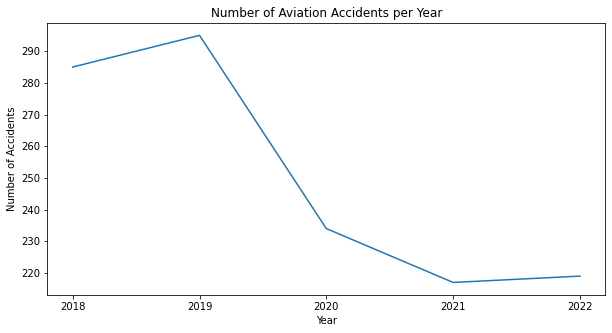

In [57]:
#Create figure
plt.figure(figsize=(10, 5))

# Create x and y 
x = acc_per_year['Year']
y = acc_per_year['Accident_Count']

#create plot and labels
plt.plot(x,y)
plt.title('Number of Aviation Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')

#Plots correctly but with a decimal point between the years i.e. 2018.0, 2018.5 etc.
# Force integer ticks (Researched solved problem code)
import matplotlib.ticker as mticker
plt.gca().xaxis.set_major_locator(mticker.MaxNLocator(integer=True))


##### **4.2.  Accident Frequency by Aircraft Type.**
**Business question**: Which aircraft types are involved in the most accidents?  
*Explore the top highest and fewest aircraft manufacturers in accidents*

In [58]:
# Create a new dataframe that contains the value counts in descending order of the manufacturer
manuf_counts = (ad['Manufacturer'].value_counts().reset_index())

# Assign column names to the new dataframe
manuf_counts.columns = ['Manufacturer', 'Accident_Count']

# Display the first few rows
manuf_counts.head()

,Manufacturer,Accident_Count
0,boeing,209
1,cessna,187
2,airbus,122
3,beechcraft,101
4,antonov,99


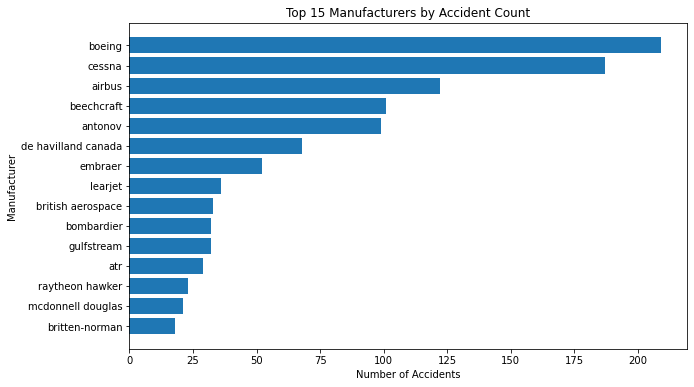

In [59]:
# Create the plot figure
plt.figure(figsize=(10, 6))

#Create the x and y axis values
x = manuf_counts['Manufacturer'].head(15)
y = manuf_counts['Accident_Count'].head(15)
plt.barh(x,y)

plt.title('Top 15 Manufacturers by Accident Count')
plt.xlabel('Number of Accidents')
plt.ylabel('Manufacturer')

# Invert y-axis so highest is on top for visual clarity
plt.gca().invert_yaxis()

In [60]:
"""Interpretation:     A small number of manufacturers account for a large proportion of reported accidents. 
                       This pattern likely reflects relative market share and fleet size and usage rather than inherent aircraft risk, 
                       and should be interpreted alongside severity and trend analyses."""

'Interpretation:     A small number of manufacturers account for a large proportion of reported accidents. \n                       This pattern likely reflects relative market share and fleet size and usage rather than inherent aircraft risk, \n                       and should be interpreted alongside severity and trend analyses.'

##### **4.3 Accident Severity by Aircraft Type**
**Business question**: Which aircraft manufacturers have the best survivability?  
*Explore accident severity and identify which manufacturer comes out of accidents relatively unscathed*

 **4.3.1) Aircraft Damage (Plane Survivability)**

In [61]:
# Aggregate damage by manufacturer

#First get top count accidents per manufacturer similar as before but restrict to top 10 manufacturers involved in accidents
manuf_counts = ad['Manufacturer'].value_counts().head(15).index.tolist()

# Filter the dataframe
top_manuf = ad[ad['Manufacturer'].isin(manuf_counts)]

# Then aggregate damage by manufacturer
#group the new dataframe by manufacturer and damage
#count and fill zeros where absent
damage_counts = top_manuf.groupby(['Manufacturer', 'Damage']).size().unstack(fill_value=0)

# Add total accidents column
damage_counts['total'] = damage_counts.sum(axis=1)

# Sort by total accidents descending so it's similar to the first graph
damage_counts = damage_counts.sort_values('total', ascending=False)

# Drop the helper column for plotting
damage_counts = damage_counts.drop(columns='total')

#preview the dataframe
#damage_counts


In [62]:
#The damage seems to be in the wrong order

#Create a list for the correct order
damage_order = ['none', 'minor', 'substantial', 'write-off','unknown']  # from least to most severe

#reassign the dataframe in this order
damage_counts = damage_counts[damage_order]

#Preview the dataframe again
#damage_counts

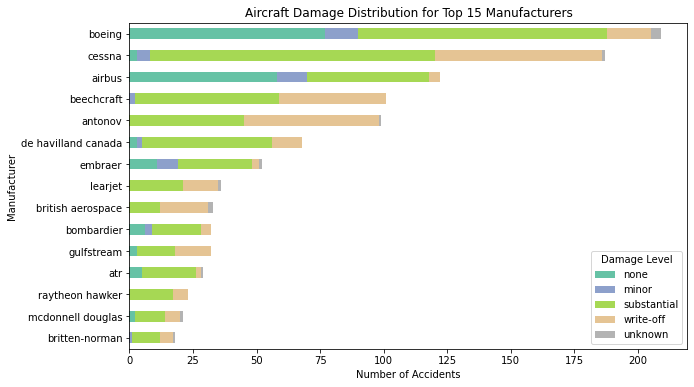

In [63]:
#Create the new plot using the existing dataframe
damage_counts.plot(
    kind='barh', #horizontal bar chart, stacked
    stacked=True,
    figsize=(10, 6),
    colormap='Set2' #cheeky feature to select colour visuals
)

plt.xlabel('Number of Accidents')
plt.ylabel('Manufacturer')
plt.title(f'Aircraft Damage Distribution for Top 15 Manufacturers')
plt.legend(title='Damage Level') 

# handy feature to plot highest at the top
plt.gca().invert_yaxis()



In [64]:
"""Interpretation:  This stacked bar chart shows aircraft damage distribution for the top manufacturers. 
                     Manufacturers with a higher proportion of none minor damage (cyan and violet) demonstrate stronger structural survivability in accidents,
                     providing useful insight for procurement decisions.
                    Boeing Airbus and Embraer have a good ratio of minor damage to total damage making them good candidates."""

'Interpretation:  This stacked bar chart shows aircraft damage distribution for the top manufacturers. \n                     Manufacturers with a higher proportion of none minor damage (cyan and violet) demonstrate stronger structural survivability in accidents,\n                     providing useful insight for procurement decisions.\n                    Boeing Airbus and Embraer have a good ratio of minor damage to total damage making them good candidates.'

**4.3.2) Fatality Rate (Passenger survivability)**

In [65]:
# Using top 15 manufacturers by accident count (same as before for consistency)
# Aggregate fatalities by manufacturer
fatalities_by_manufacturer = top_manuf.groupby('Manufacturer')['Fatalities'].sum().sort_values(ascending=False)

#preview the dataframe
fatalities_by_manufacturer

Manufacturer
boeing                 889
antonov                310
cessna                 120
beechcraft             117
de havilland canada    114
airbus                 102
atr                     85
british aerospace       31
learjet                 24
bombardier              20
mcdonnell douglas       17
gulfstream              13
britten-norman          11
embraer                  8
raytheon hawker          1
Name: Fatalities, dtype: Int64

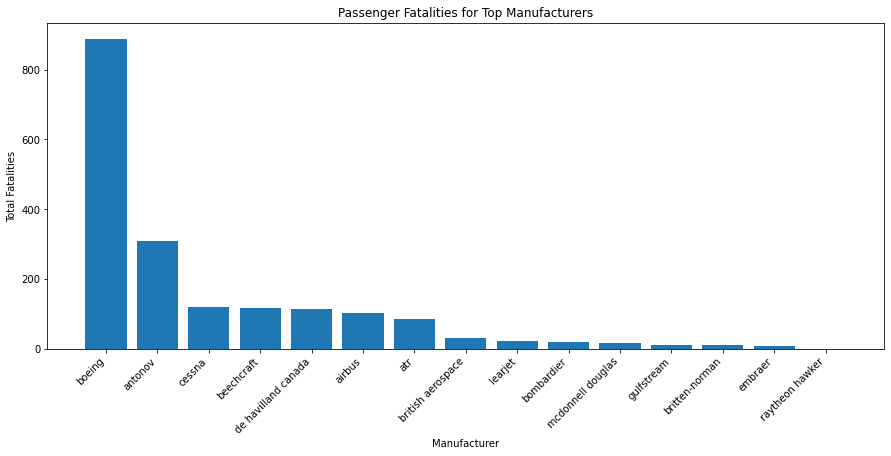

In [66]:
#Create the plot figure
plt.figure(figsize=(15, 6))

#Create the x and y axes values
x = fatalities_by_manufacturer.index
y =fatalities_by_manufacturer.values

plt.bar(x, y)
plt.xlabel('Manufacturer')
plt.ylabel('Total Fatalities')
plt.title('Passenger Fatalities for Top Manufacturers')

# Rotate x-axis labels (e.g., 45 degrees)
plt.xticks(rotation=45, ha='right')

#plt.show to remove printed out values
plt.show()


In [67]:
"""Interpretation:  This chart shows total passenger fatalities for the top manufacturers. Lower fatality counts suggest stronger passenger survivability,
                    complementing the aircraft damage analysis. 
                    Together, these metrics provide a clearer picture of which manufacturers produce the safest aircraft.
                    For instance, it was noted previously that boeing airbus and embreaer had good aircraft survivability, however, 
                    boeing has poor passenger survivability in general. 
"""

'Interpretation:  This chart shows total passenger fatalities for the top manufacturers. Lower fatality counts suggest stronger passenger survivability,\n                    complementing the aircraft damage analysis. \n                    Together, these metrics provide a clearer picture of which manufacturers produce the safest aircraft.\n                    For instance, it was noted previously that boeing airbus and embreaer had good aircraft survivability, however, \n                    boeing has poor passenger survivability in general. \n'

##### **4.4 Most survivable aircraft models**
**Business question**: Which specific aircraft models should be prioritized for acquisition based on survivability?  
*Explore models of aircraft by passenger and plane survivability to prioritize a few*

In [68]:
"""Based on the visualizations above, the aircraft manufacturers can be narrowed down based on human survivability and plane survivability
    Plane survivability: 'boeing', 'airbus' , 'embraer'
    Human survivability: 'britten-norman', 'raytheon hawker', 'gulfstream'
    Taking a better look at these models
"""

"Based on the visualizations above, the aircraft manufacturers can be narrowed down based on human survivability and plane survivability\n    Plane survivability: 'boeing', 'airbus' , 'embraer'\n    Human survivability: 'britten-norman', 'raytheon hawker', 'gulfstream'\n    Taking a better look at these models\n"

In [69]:
#Putting these into a list
top_survivable_makes = ['boeing','airbus','embraer','britten-norman','raytheon hawker','gulfstream']  # replace with your actual top makes

# Filter the dataframe
selected_models = ad[ad['Manufacturer'].isin(top_survivable_makes)]


In [70]:
#Aggregate by model

#group the selected models manufacturer by model as well
model_stats = selected_models.groupby(['Manufacturer', 'Model']).agg(
    total_accidents=('Fatalities', 'size'),  #use size as we don't have a unique id
    total_fatalities=('Fatalities', 'sum') #sum by total fatalities
).reset_index() #reset the index to get a good new dataframe

#preview the df
model_stats

,Manufacturer,Model,total_accidents,total_fatalities
0,airbus,a220-100,1,0
1,airbus,a300b4-203 (f),2,0
2,airbus,a300b4-622r (f),1,0
3,airbus,a310-304,2,0
4,airbus,a319,1,0
...,...,...,...,...
233,raytheon hawker,hs-125,1,0
234,raytheon hawker,hs-125-400,1,0
235,raytheon hawker,hs-125-600a,1,1
236,raytheon hawker,hs-125-700a,1,0


In [71]:
#Create a survivability metric
#total fatalities divided by total accidents for our case =fatalities per accident for each model
model_stats['fatality_score'] = model_stats['total_fatalities'] / model_stats['total_accidents']

#Select top n models per manufacturer, for our case n=3
best_buy = (
    model_stats
    .sort_values(['Manufacturer', 'fatality_score']) #sort by manufacturer and fatalities 
    .groupby('Manufacturer') #group by manufacturer
    .head(3)  # top 3 models per manufacturer
)
best_buy

,Manufacturer,Model,total_accidents,total_fatalities,fatality_score
0,airbus,a220-100,1,0,0.0
1,airbus,a300b4-203 (f),2,0,0.0
2,airbus,a300b4-622r (f),1,0,0.0
44,boeing,717-2bd,2,0,0.0
45,boeing,727-2b6 adv. (f),1,0,0.0
47,boeing,737 max 8-200,1,0,0.0
172,britten-norman,bn-2a-21 islander,2,0,0.0
173,britten-norman,bn-2a-26 islander,2,0,0.0
174,britten-norman,bn-2a-27 islander,4,0,0.0
182,embraer,170-200 lr (erj-175lr),1,0,0.0


In [72]:
"""Plotting this would be pointless. However, it can be observed that in all of these, the fatalities are none, 
    even for above 4 accidents per aircraft model indicating very good survivability.
"""

'Plotting this would be pointless. However, it can be observed that in all of these, the fatalities are none, \n    even for above 4 accidents per aircraft model indicating very good survivability.\n'

Lets see the ones with poorest survivability for each of these models instead, to see the ones bringing down the average

In [73]:
poor_buy = (
    model_stats
    .sort_values(['Manufacturer', 'fatality_score']) #sort by manufacturer and fatalities 
    .groupby('Manufacturer') #group by manufacturer
    .tail(3)  # top 3 models per manufacturer
)
poor_buy

,Manufacturer,Model,total_accidents,total_fatalities,fatality_score
19,airbus,a320-251n,4,2,0.500000
20,airbus,a320-271n,4,2,0.500000
14,airbus,a320-214,11,98,8.909091
46,boeing,737 max 8,3,346,115.333333
90,boeing,737-89p (wl),1,132,132.000000
108,boeing,737-8kv (wl),1,176,176.000000
171,britten-norman,bn-2a-20 islander,1,1,1.000000
175,britten-norman,bn-2a-6 islander,1,4,4.000000
180,britten-norman,bn-2b-27 islander,1,6,6.000000
204,embraer,erj-175lr (erj-170-200 lr),2,1,0.500000


In [74]:
"""Interpretation: There are a few aircraft models that are tarnishing the reputation of the manufacturer.
    The boeing 737 as it carries a large passenger total once crashed yields a high fatality rate
    The airbus  a320 is prone to crashing, a total 11 times making it an unsuitable purchase candidate """

'Interpretation: There are a few aircraft models that are tarnishing the reputation of the manufacturer.\n    The boeing 737 as it carries a large passenger total once crashed yields a high fatality rate\n    The airbus  a320 is prone to crashing, a total 11 times making it an unsuitable purchase candidate '

#####
Further visualisation can be carried out, not only on this notebook but on tableau as well.  
For the scope of this project, similar such metrics are visualized on the interactive [tableau dashboard](https://public.tableau.com/views/phase-1-project-dashboard/Dashboard1?:language=en-US&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link) below.


![alt text](<Dashboard_image.png>)

### <ins>5. Key Findings<ins>

The following are the key findings from the analysis:

*   Accident rates have been on a decline over time in the past few years
*   Reknowned manufacturers produce aircrafts which have higher accident rates, likely due to market share and fleet size in comparison to others
*   Aircraft and passengersurvivability are down to models and not manufacturers. A few models have higher accident rates and high fatalities in accidents, skewing results.


### <ins>6. Business Recommendations.<ins>

**Reccomendation 1:**
*   ***Venture into Aviation industry is valid at this particular time.***

*   **Evidence:** Chart from 4.1 reveals that aviation accidents have been on quite a decline over the past few years.
                  
*   **Business Impact:** Lower risk and potential for business diversification.

**Reccomendation 2:**
*   ***Favour companies with big fleets, but consider model carefully.***

*   **Evidence:** Chart from 4.2 and 4.3 reveal that a few of these companies such as embraer and airbus have relatively  
                    good aircraft survivability and passenger safety. Chart 4.4 reveals a few models are responsible for most fatality numbers.
                  
*   **Business Impact:** Good supply network and chain, market prescence and brand name, increasing investor confidence.

**Reccomendation 3:**
*   ***Prioritize procurement of aircraft types with lower accident rates.***

*   **Evidence:** Table from 4.4 reveals best purchase options in which aircraft with low fatalities per accident are revealed.  
                  The dashboard also highlights a few examples of aircraft to purchase e.g the cessna 208 caravan which although  
                  has been in many accidents has little to no fatalities as well as little to no plane damage in accidents.
                  
*   **Business Impact:** Reduced operational risk and potential insurance cost savings.

### <ins>7. Limitations and Next Steps<ins>

**Limitations**
*   Data is missing a few too many important entries i.e. Aircraft age, Flight cause, Phase of Flight, Total flight hours e.t.c
    Which are important factors to consider when investigating potential purchases.
*   Variation over time: mergers and acquisitions, location name changes, Aircraft naming convention
    These inhibit data accuracy
*   Results show correlation, not necessarily causation.Without more data, insight is merely speculative.

**Next Steps**
*   Incorporate aircraft flight volume data to decipher true accident occurence rate.
*   Seperate into commercial, private or military operations and conduct further analysis.
*   Involve manufacture date for better understanding of aircraft life before purchase.

### <ins>8. Conclusion<ins>

This analysis explored historical aviation accident data to identify patterns associated with aircraft safety and operational risk. Through cleaning and standardizing key  
variables such as aircraft type, manufacturer, and operator, the dataset was made more suitable for consistent grouping and comparison. The exploratory analysis highlighted  
meaningful differences in survivability and accident outcomes across aircraft categories and operational contexts. While the findings are based on historical data and  
subject to data quality limitations, it provides a practical foundation for informing aircraft selection and risk-aware decision making.   
Future work could extend this analysis by incorporating additional operational variables or more granular aircraft specifications.